## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('BTC_Cleaned_Data.csv')

### Basic Info of Dateset

In [6]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2622 non-null   object 
 1   open               2622 non-null   float64
 2   high               2622 non-null   float64
 3   low                2622 non-null   float64
 4   close              2622 non-null   float64
 5   Volume BTC         2622 non-null   float64
 6   Volume USD         2622 non-null   float64
 7   Target             2622 non-null   int64  
 8   Daily_Return       2622 non-null   float64
 9   High_Low_Spread    2622 non-null   float64
 10  Close_Open_Spread  2622 non-null   float64
 11  MA_7               2622 non-null   float64
 12  MA_30              2622 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 266.4+ KB


None

In [7]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
date                 0
open                 0
high                 0
low                  0
close                0
Volume BTC           0
Volume USD           0
Target               0
Daily_Return         0
High_Low_Spread      0
Close_Open_Spread    0
MA_7                 0
MA_30                0
dtype: int64


In [8]:
# Summary Statistics (Raw Prices)
print("\n--- Summary Statistics (Raw Data) ---")
print(df[['open', 'high', 'low', 'close', 'Volume USD']].describe())


--- Summary Statistics (Raw Data) ---
               open          high           low         close    Volume USD
count   2622.000000   2622.000000   2622.000000   2622.000000  2.622000e+03
mean   11818.636236  12167.765088  11417.675454  11834.965568  6.166820e+07
std    16318.294698  16786.177912  15762.506260  16328.598542  1.076827e+08
min      162.000000    212.840000    152.400000    162.000000  0.000000e+00
25%      673.725000    683.935000    659.782500    673.560000  9.708980e+03
50%     6456.240000   6598.500000   6349.735000   6469.010000  2.434335e+07
75%    10780.620000  11080.090000  10422.810000  10783.037500  8.072279e+07
max    67547.490000  69000.000000  66250.000000  67559.000000  1.446125e+09


### Time-Series Trend Analysis

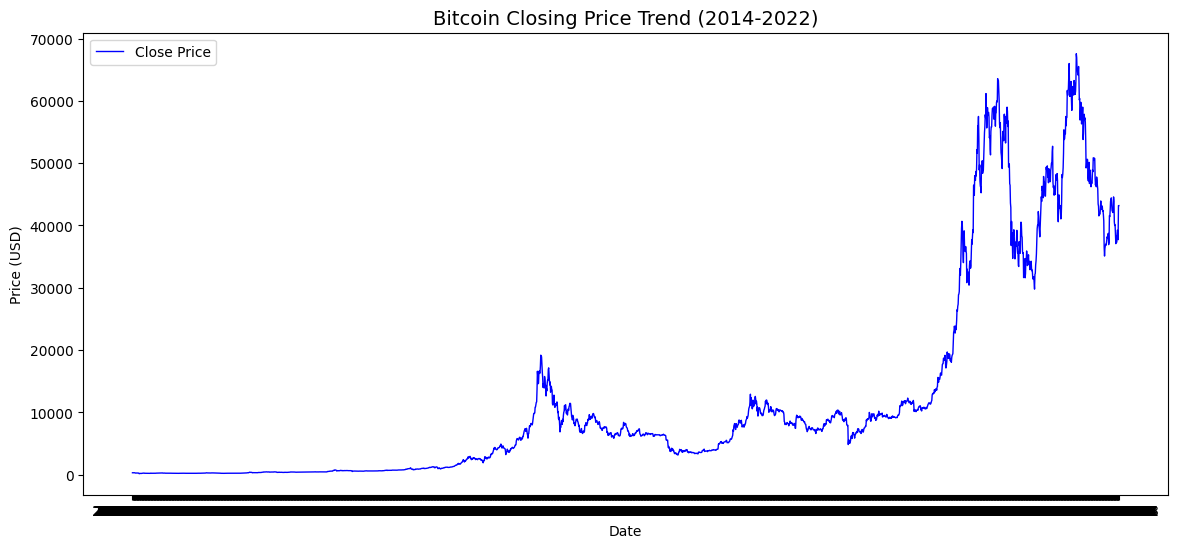

In [10]:
# Plot 1: Closing Price Trend
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue', linewidth=1)
plt.title('Bitcoin Closing Price Trend (2014-2022)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

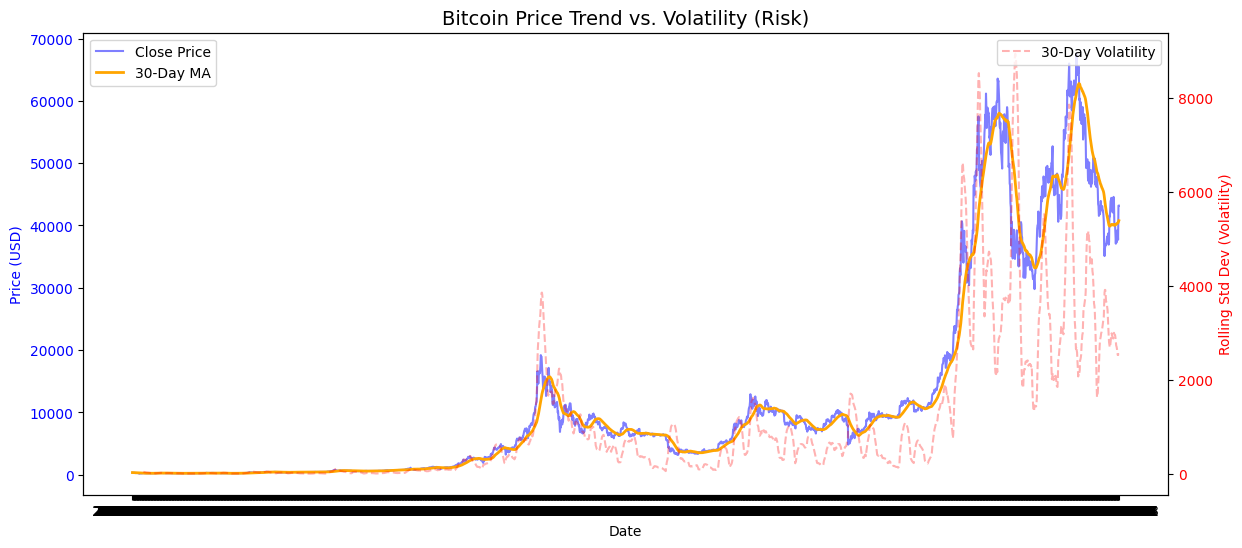

In [19]:
df['Rolling_Std'] = df['close'].rolling(window=30).std()

# Plot 2: Price vs Moving Average vs Volatility
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.plot(df['date'], df['close'], color='blue', alpha=0.5, label='Close Price')
ax1.plot(df['date'], df['MA_30'], color='orange', linewidth=2, label='30-Day MA')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Rolling Std Dev (Volatility)', color='red')
ax2.plot(df['date'], df['Rolling_Std'], color='red', alpha=0.3, linestyle='--', label='30-Day Volatility')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Bitcoin Price Trend vs. Volatility (Risk)', fontsize=14)
plt.show()

### Target Variable Analysis

Bullish Days: 1408 (53.70%)
Bearish Days: 1214 (46.30%)


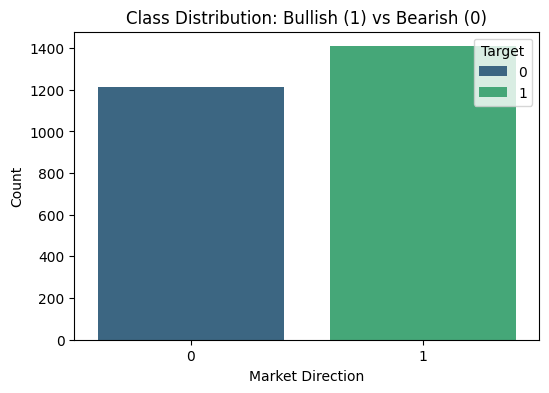

In [14]:
# Plot 3: Target Class Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df, hue = 'Target', palette='viridis')
plt.title('Class Distribution: Bullish (1) vs Bearish (0)', fontsize=12)
plt.xlabel('Market Direction')
plt.ylabel('Count')
# Add labels
bullish_count = df['Target'].value_counts()[1]
bearish_count = df['Target'].value_counts()[0]
print(f"Bullish Days: {bullish_count} ({(bullish_count/len(df))*100:.2f}%)")
print(f"Bearish Days: {bearish_count} ({(bearish_count/len(df))*100:.2f}%)")
plt.show()

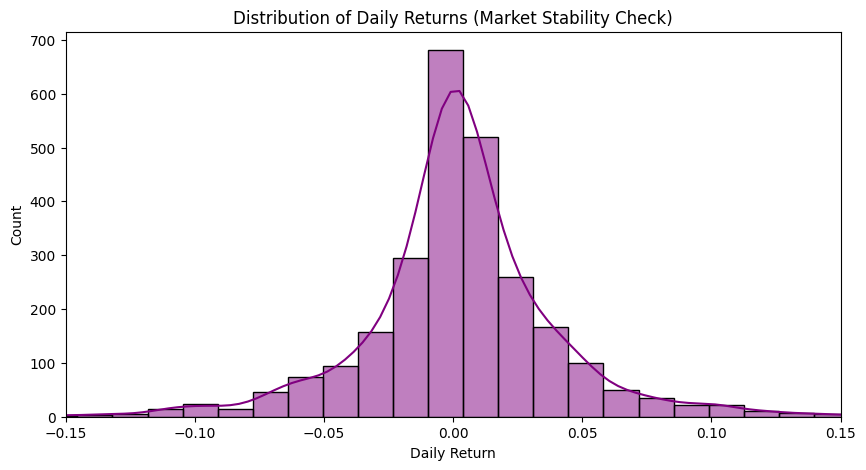

In [16]:
# Plot 4: Feature Distribution (Daily Returns)
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='purple') # type: ignore
plt.title('Distribution of Daily Returns (Market Stability Check)', fontsize=12)
plt.xlabel('Daily Return')
plt.xlim(-0.15, 0.15) # Zoom in to ignore extreme outlier wicks
plt.show()

### Bivariate Analysis

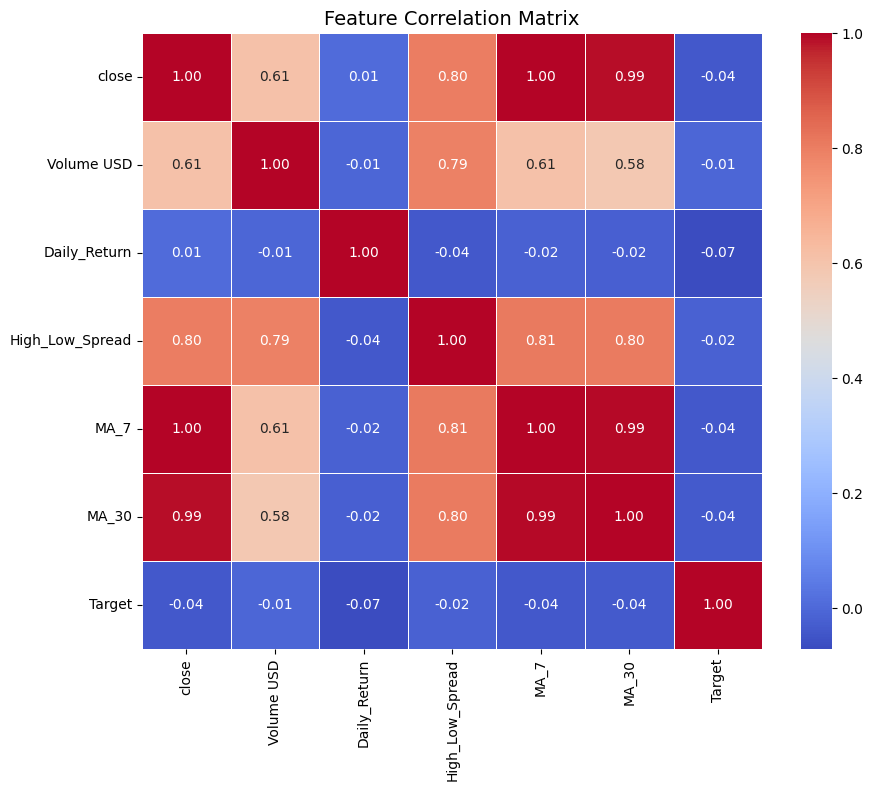

In [18]:
# Plot 5: Correlation Heatmap
# Select only numerical features relevant for correlation
corr_features = ['close', 'Volume USD', 'Daily_Return', 'High_Low_Spread', 'MA_7' ,'MA_30', 'Target']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

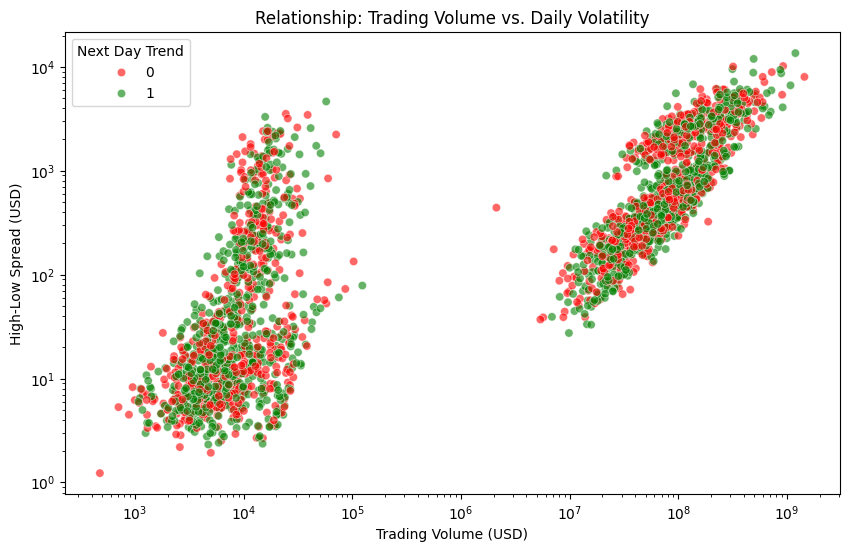

In [20]:
# Plot 6: Volume vs Volatility Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume USD', y='High_Low_Spread', hue='Target', data=df, alpha=0.6, palette={0: 'red', 1: 'green'})
plt.title('Relationship: Trading Volume vs. Daily Volatility', fontsize=12)
plt.xlabel('Trading Volume (USD)')
plt.ylabel('High-Low Spread (USD)')
plt.xscale('log') # Log scale because volume is massive
plt.yscale('log') # Log scale for spread to see patterns better
plt.legend(title='Next Day Trend')
plt.show()